# Loading the necessary libraries and the data from the local directory

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pprint import pprint
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', -1)

In [3]:
train_data = pd.read_csv(r'./data_files/ml_case_training_data.csv')
train_hist = pd.read_csv(r'./data_files/ml_case_training_hist_data.csv')
train_output = pd.read_csv(r'./data_files/ml_case_training_output.csv')

In [5]:
train_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [6]:
train_hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


train_output.head()

In [4]:
train_hist_bymean = train_hist.groupby('id').mean()

In [8]:
train_hist_bymean.head()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [5]:
# Merge all the three datas; training_data, training_hist_data, training_output
data = pd.merge(train_data, train_hist_bymean, on = 'id')
data = pd.merge(data, train_output, on = 'id')

# Inpecting the data for missing values, outliers and useless columns

In [9]:
data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.122856,0.102137,0.072579,40.640023,24.384011,16.256008,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149934,0.000000,0.000000,44.315416,0.000000,0.000000,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0


In [10]:
data.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.141004,0.054379,0.030695,43.327752,10.691430,6.451230,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.024297,0.049860,0.036220,5.362695,12.825881,7.761357,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.123974,0.000000,0.000000,40.675988,0.000000,0.000000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.147251,0.085946,0.000000,44.281745,0.000000,0.000000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.150316,0.102396,0.072778,44.370635,24.388455,16.248110,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,0.278759,0.196275,0.102952,59.444710,36.490692,16.818917,1.000000


In [11]:
data.describe(include=np.object)

,id,activity_new,channel_sales,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,has_gas,origin_up
count,16096,6551,11878,16096,16094,3508,15939,16056,16096,16009
unique,16096,419,7,1961,371,1133,2307,398,2,5
top,1f9593ffe8dfe43ddced0e6a71b979ea,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,2009-08-01,2016-02-01,2009-07-14,2015-11-01,2015-06-23,f,lxidpiddsbxsbosboudacockeimpuepw
freq,1,1577,7377,99,152,34,592,637,13132,7825


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [13]:
# Checking for missing values
data.isnull().sum()

id                          0    
activity_new                9545 
campaign_disc_ele           16096
channel_sales               4218 
cons_12m                    0    
cons_gas_12m                0    
cons_last_month             0    
date_activ                  0    
date_end                    2    
date_first_activ            12588
date_modif_prod             157  
date_renewal                40   
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m           0    
forecast_cons_year          0    
forecast_discount_energy    126  
forecast_meter_rent_12m     0    
forecast_price_energy_p1    126  
forecast_price_energy_p2    126  
forecast_price_pow_p1       126  
has_gas                     0    
imp_cons                    0    
margin_gross_pow_ele        13   
margin_net_pow_ele          13   
nb_prod_act                 0    
net_margin                  15   
num_years_anti

# Columns that are considered irrelevant to the analysis given that most of their values are missing
drop_column = ['campaign_disc_ele', 'activity_new', 
               'date_first_activ', 'forecast_base_bill_ele', 'forecast_base_bill_year', 
              'forecast_bill_12m', 'forecast_cons']
data_clean = data.drop(drop_column, 1)
data_clean.set_index(keys = 'id', inplace = True)
data_clean.head()

In [6]:
# Removing columns with more than half empty values.
half_count = len(data) / 2
clean_data = data.dropna(thresh=half_count, axis=1)

In [7]:
clean_data.set_index('id', inplace = True)

In [8]:
# Dropping the above listed columns
drop_list = ['channel_sales', 'margin_gross_pow_ele', 'origin_up', 'date_modif_prod']
clean_data = clean_data.drop(drop_list, axis=1)

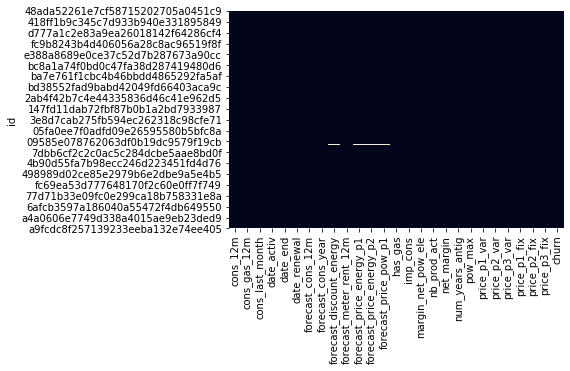

In [15]:
# Using sns.heatmap to visualize and identify which columns have empty values
sns.heatmap(clean_data.isnull(), cbar=False)

In [9]:
clean_data = clean_data[(~clean_data['forecast_discount_energy'].isna() & ~clean_data['date_renewal'].isna() & ~clean_data['net_margin'].isna())]

In [10]:
# changine the datatype of 'has_gas' column from string to int for easy analysis
dictn = {'f':0, 't':1}
clean_data['has_gas'].replace(dictn, inplace=True)

In [40]:
for a in ['date_activ', 'date_end',  'date_renewal']:
    clean_data[a] = pd.to_datetime(clean_data[a], format='%d/%m/%Y')

In [12]:
with open(r'./data_files/cleaned_data.pk', 'wb') as file:
    pickle.dump(clean_data, file)

In [3]:
file = open(r'./data_files/cleaned_data.pk', 'rb')
clean_data = pickle.load(file)
file.close()

In [4]:
clean_data.isna().sum()

cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_renewal                0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
pow_max                     0
price_p1_var                0
price_p2_var                0
price_p3_var                0
price_p1_fix                0
price_p2_fix                0
price_p3_fix                0
churn                       0
dtype: int64

In [60]:
clean_data.dtypes

cons_12m                             int64
cons_gas_12m                         int64
cons_last_month                      int64
date_activ                  datetime64[ns]
date_end                    datetime64[ns]
date_renewal                datetime64[ns]
forecast_cons_12m                  float64
forecast_cons_year                   int64
forecast_discount_energy           float64
forecast_meter_rent_12m            float64
forecast_price_energy_p1           float64
forecast_price_energy_p2           float64
forecast_price_pow_p1              float64
has_gas                              int64
imp_cons                           float64
margin_net_pow_ele                 float64
nb_prod_act                          int64
net_margin                         float64
num_years_antig                      int64
pow_max                            float64
price_p1_var                       float64
price_p2_var                       float64
price_p3_var                       float64
price_p1_fi

In [41]:
clean_data.head()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,2016-11-06,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,0,831.8,-41.76,1,1732.36,3,180.000,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,0
24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,2,678.99,3,43.648,0.122856,0.102137,0.072579,40.640023,24.384011,16.256008,1
d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.0,16.38,1,18.89,6,13.800,0.149934,0.000000,0.000000,44.315416,0.000000,0.000000,0
764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.0,28.60,1,6.60,6,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0
bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.0,30.22,1,25.46,6,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0


In [28]:
clean_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
count,1.591600e+04,1.591600e+04,1.591600e+04,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.00000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000,15916.000000
mean,1.933817e+05,3.143955e+04,1.946712e+04,2358.101277,1897.612842,0.969716,70.273586,0.135891,0.052903,43.531007,0.184154,195.029497,21.414696,1.34814,217.932417,5.031603,20.519426,0.140990,0.054371,0.030701,43.327235,10.690614,6.455077,0.097323
std,6.775051e+05,1.720612e+05,8.258467e+04,3996.075920,5238.698024,5.107413,78.758003,0.026220,0.048624,5.213404,0.387622,492.476963,27.922002,1.46626,364.083893,1.675667,21.325632,0.024181,0.049863,0.036222,5.332045,12.821758,7.763920,0.296407
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,0.000000,-9038.210000,-615.660000,1.00000,-4148.990000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.894750e+03,0.000000e+00,0.000000e+00,513.080000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,0.000000,11.950000,1.00000,52.037500,4.000000,12.500000,0.123976,0.000000,0.000000,40.674580,0.000000,0.000000,0.000000
50%,1.527450e+04,0.000000e+00,8.980000e+02,1178.835000,376.000000,0.000000,19.435000,0.142881,0.086163,44.311378,0.000000,44.065000,20.840000,1.00000,119.535000,5.000000,13.856000,0.147251,0.085959,0.000000,44.281745,0.000000,0.000000,0.000000
75%,4.991200e+04,0.000000e+00,4.118250e+03,2686.125000,1992.000000,0.000000,131.500000,0.146348,0.098837,44.311378,0.000000,217.810000,29.560000,1.00000,275.232500,6.000000,19.800000,0.150309,0.102396,0.072779,44.370635,24.388455,16.248110,0.000000
max,1.609711e+07,4.154590e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,1.000000,15042.790000,374.640000,32.00000,24570.650000,16.000000,500.000000,0.278571,0.196275,0.102952,59.336628,36.490692,16.818917,1.000000


In [15]:
#Creating a dictionary that explains the column
data_dictionary = {
'id': 'contact id',
'activity_new': 'category of the company\'s activity',
'campaign_disc_ele': 'code of the electricity campaign the customer last subscribed to',
'channel_sales': 'code of the sales channel',
'cons_12m': 'electricity consumption of the past 12 months',
'cons_gas_12m': 'gas consumption of the past 12 months',
'cons_last_month': 'electricity consumption of the last month',
'date_activ': 'date of activation of the contract',
'date_end': 'registered date of the end of the contract',
'date_first_activ': 'date of first contract of the client',
'date_modif_prod': 'date of last modification of the product',
'date_renewal': 'date of the next contract renewal',
'forecast_base_bill_ele': 'forecasted electricity bill baseline for next month',
'forecast_base_bill_year': 'forecasted electricity bill baseline for calendar year',
'forecast_bill_12m': 'forecasted electricity bill baseline for 12 months',
'forecast_cons': 'forecasted electricity consumption for next month',
'forecast_cons_12m': 'forecasted electricity consumption for next 12 months',
'forecast_cons_year': 'forecasted electricity consumption for next calendar year',
'forecast_discount_energy': 'forecasted value of current discount',
'forecast_meter_rent_12m': 'forecasted bill of meter rental for the next 12 months',
'forecast_price_energy_p1': 'forecasted energy price for 1st period',
'forecast_price_energy_p2': 'forecasted energy price for 2nd period',
'forecast_price_pow_p1': 'forecasted power price for 1st period',
'has_gas': 'indicated if client is also a gas client',
'imp_cons': 'current paid consumption',
'margin_gross_pow_ele': 'gross margin on power subscription',
'margin_net_pow_ele': 'net margin on power subscription',
'nb_prod_act': 'number of active products and services',
'net_margin': 'total net margin',
'num_years_antig': 'antiquity of the client (in number of years)',
'origin_up': 'code of the electricity campaign the customer first subscribed to',
'pow_max': 'subscribed power',
'price_date': 'reference date',
'price_p1_var': 'price of energy for the 1st period',
'price_p2_var': 'price of energy for the 2nd period',
'price_p3_var': 'price of energy for the 3rd period',
'price_p1_fix': 'price of power for the 1st period',
'price_p2_fix': 'price of power for the 2nd period',
'price_p3_fix': 'price of power for the 3rd period',
'churn': 'has the client churned over the next 3 months'
                  }

In [16]:
dictionary = pd.DataFrame(data_dictionary.items(), columns=['name', 'description'])
dictionary.to_csv(r'./data_files/meta_data.csv')

In [1]:
dictionary

NameError: name 'dictionary' is not defined

In [18]:
# Geting the datatype of each column
data_dtypes = pd.DataFrame(clean_data.dtypes, columns=['dtypes'])
data_dtypes = data_dtypes.reset_index()
#data_dtypes['name'] = data_dtypes['index'] * removed
data_dtypes.columns = ['name', 'data_type']
#data_dtypes = data_dtypes[['name', 'dtypes']] * removed
#data_dtypes['first_value'] = data2.loc[0].values *removed
preview = data_dtypes.merge(dictionary, on='name', how='left')
preview.head()

,name,data_type,description
0,cons_12m,int64,electricity consumption of the past 12 months
1,cons_gas_12m,int64,gas consumption of the past 12 months
2,cons_last_month,int64,electricity consumption of the last month
3,date_activ,datetime64[ns],date of activation of the contract
4,date_end,datetime64[ns],registered date of the end of the contract


After analyzing the columns I made the following observation:
* id - randomly generated object, no use in analysis'
* origin_up - randomly generated object
* channel_sales - randomly generated object
* margin_ggross_pow_ele - redundant
* date_modif_prod - redundant
These columns will be dropped to advance the cleaning process

## I need you to look into the code below with the method we are going to lose 180 data rows without necessarily altering the dataset itself, if this method is accepted it means the data3 will be changed to data2

### This cell should be removed

In [55]:
# From the visualization above the following columns contains missing values
colz = ['forecast_discount_energy', 'forecast_price_energy_p1', 'forecast_price_energy_p2',
        'forecast_price_pow_p1', 'margin_net_pow_ele', 'net_margin', 'pow_max', 'price_p1_var', 'price_p2_var', 'price_p3_var',
       'price_p1_fix', 'price_p2_fix', 'price_p3_fix'
       ]
data2[colz].isnull().sum()

forecast_discount_energy    126
forecast_price_energy_p1    126
forecast_price_energy_p2    126
forecast_price_pow_p1       126
margin_net_pow_ele          13 
net_margin                  15 
pow_max                     3  
price_p1_var                2  
price_p2_var                2  
price_p3_var                2  
price_p1_fix                2  
price_p2_fix                2  
price_p3_fix                2  
dtype: int64

### The two cell below should be removed

In [23]:
# I replaced the missing values with their respective mean values
data2[colz] = data2[colz].fillna(data2[colz].mean())

In [24]:
# I went ahead to check for any more missing values and discovered that date renewal and date end have missing values as well
data2.isnull().sum()

cons_12m                    0 
cons_gas_12m                0 
cons_last_month             0 
date_activ                  0 
date_end                    2 
date_renewal                40
forecast_cons_12m           0 
forecast_cons_year          0 
forecast_discount_energy    0 
forecast_meter_rent_12m     0 
forecast_price_energy_p1    0 
forecast_price_energy_p2    0 
forecast_price_pow_p1       0 
has_gas                     0 
imp_cons                    0 
margin_net_pow_ele          0 
nb_prod_act                 0 
net_margin                  0 
num_years_antig             0 
pow_max                     0 
price_p1_var                0 
price_p2_var                0 
price_p3_var                0 
price_p1_fix                0 
price_p2_fix                0 
price_p3_fix                0 
churn                       0 
dtype: int64

### The two cell below should be removed

In [25]:
# Having located the missing dates and with not enough information to fill them I opt to drop the rows
# since they are a few missing dates compared with the overall and will not affect the outcome of the analysis
data2 = data2[~data2['date_renewal'].isnull()]

In [26]:
# Confirming that there are no empty values
data2.isnull().sum()

cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_renewal                0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
pow_max                     0
price_p1_var                0
price_p2_var                0
price_p3_var                0
price_p1_fix                0
price_p2_fix                0
price_p3_fix                0
churn                       0
dtype: int64

# Visualization

0    14367
1    1549 
Name: churn, dtype: int64
The percentage value count of churn is given  as 

 0    90.3
1    9.7 
Name: churn, dtype: object 



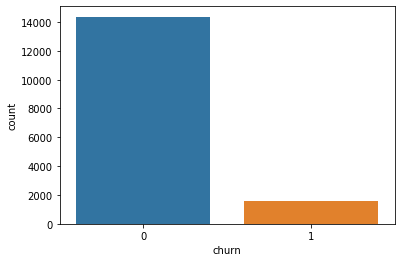

In [8]:
# Checking for imbalance in the dataset

val_count_of_churn = clean_data['churn'].value_counts()
print(val_count_of_churn)
val_count_of_churn_percentage = (val_count_of_churn/len(clean_data))*100
val_count_of_churn_percentage.astype('str')
val_count_of_churn_percentage = val_count_of_churn_percentage.apply(lambda x: '{:.1f}'.format(x))
print('The percentage value count of churn is given  as \n\n', val_count_of_churn_percentage, '\n')

fig, ax = plt.subplots()
sns.countplot(x = clean_data['churn']);
fig.savefig(r'.\images\count_plot_of_churn.png')

In [11]:
col_num = clean_data.select_dtypes(include=np.number)

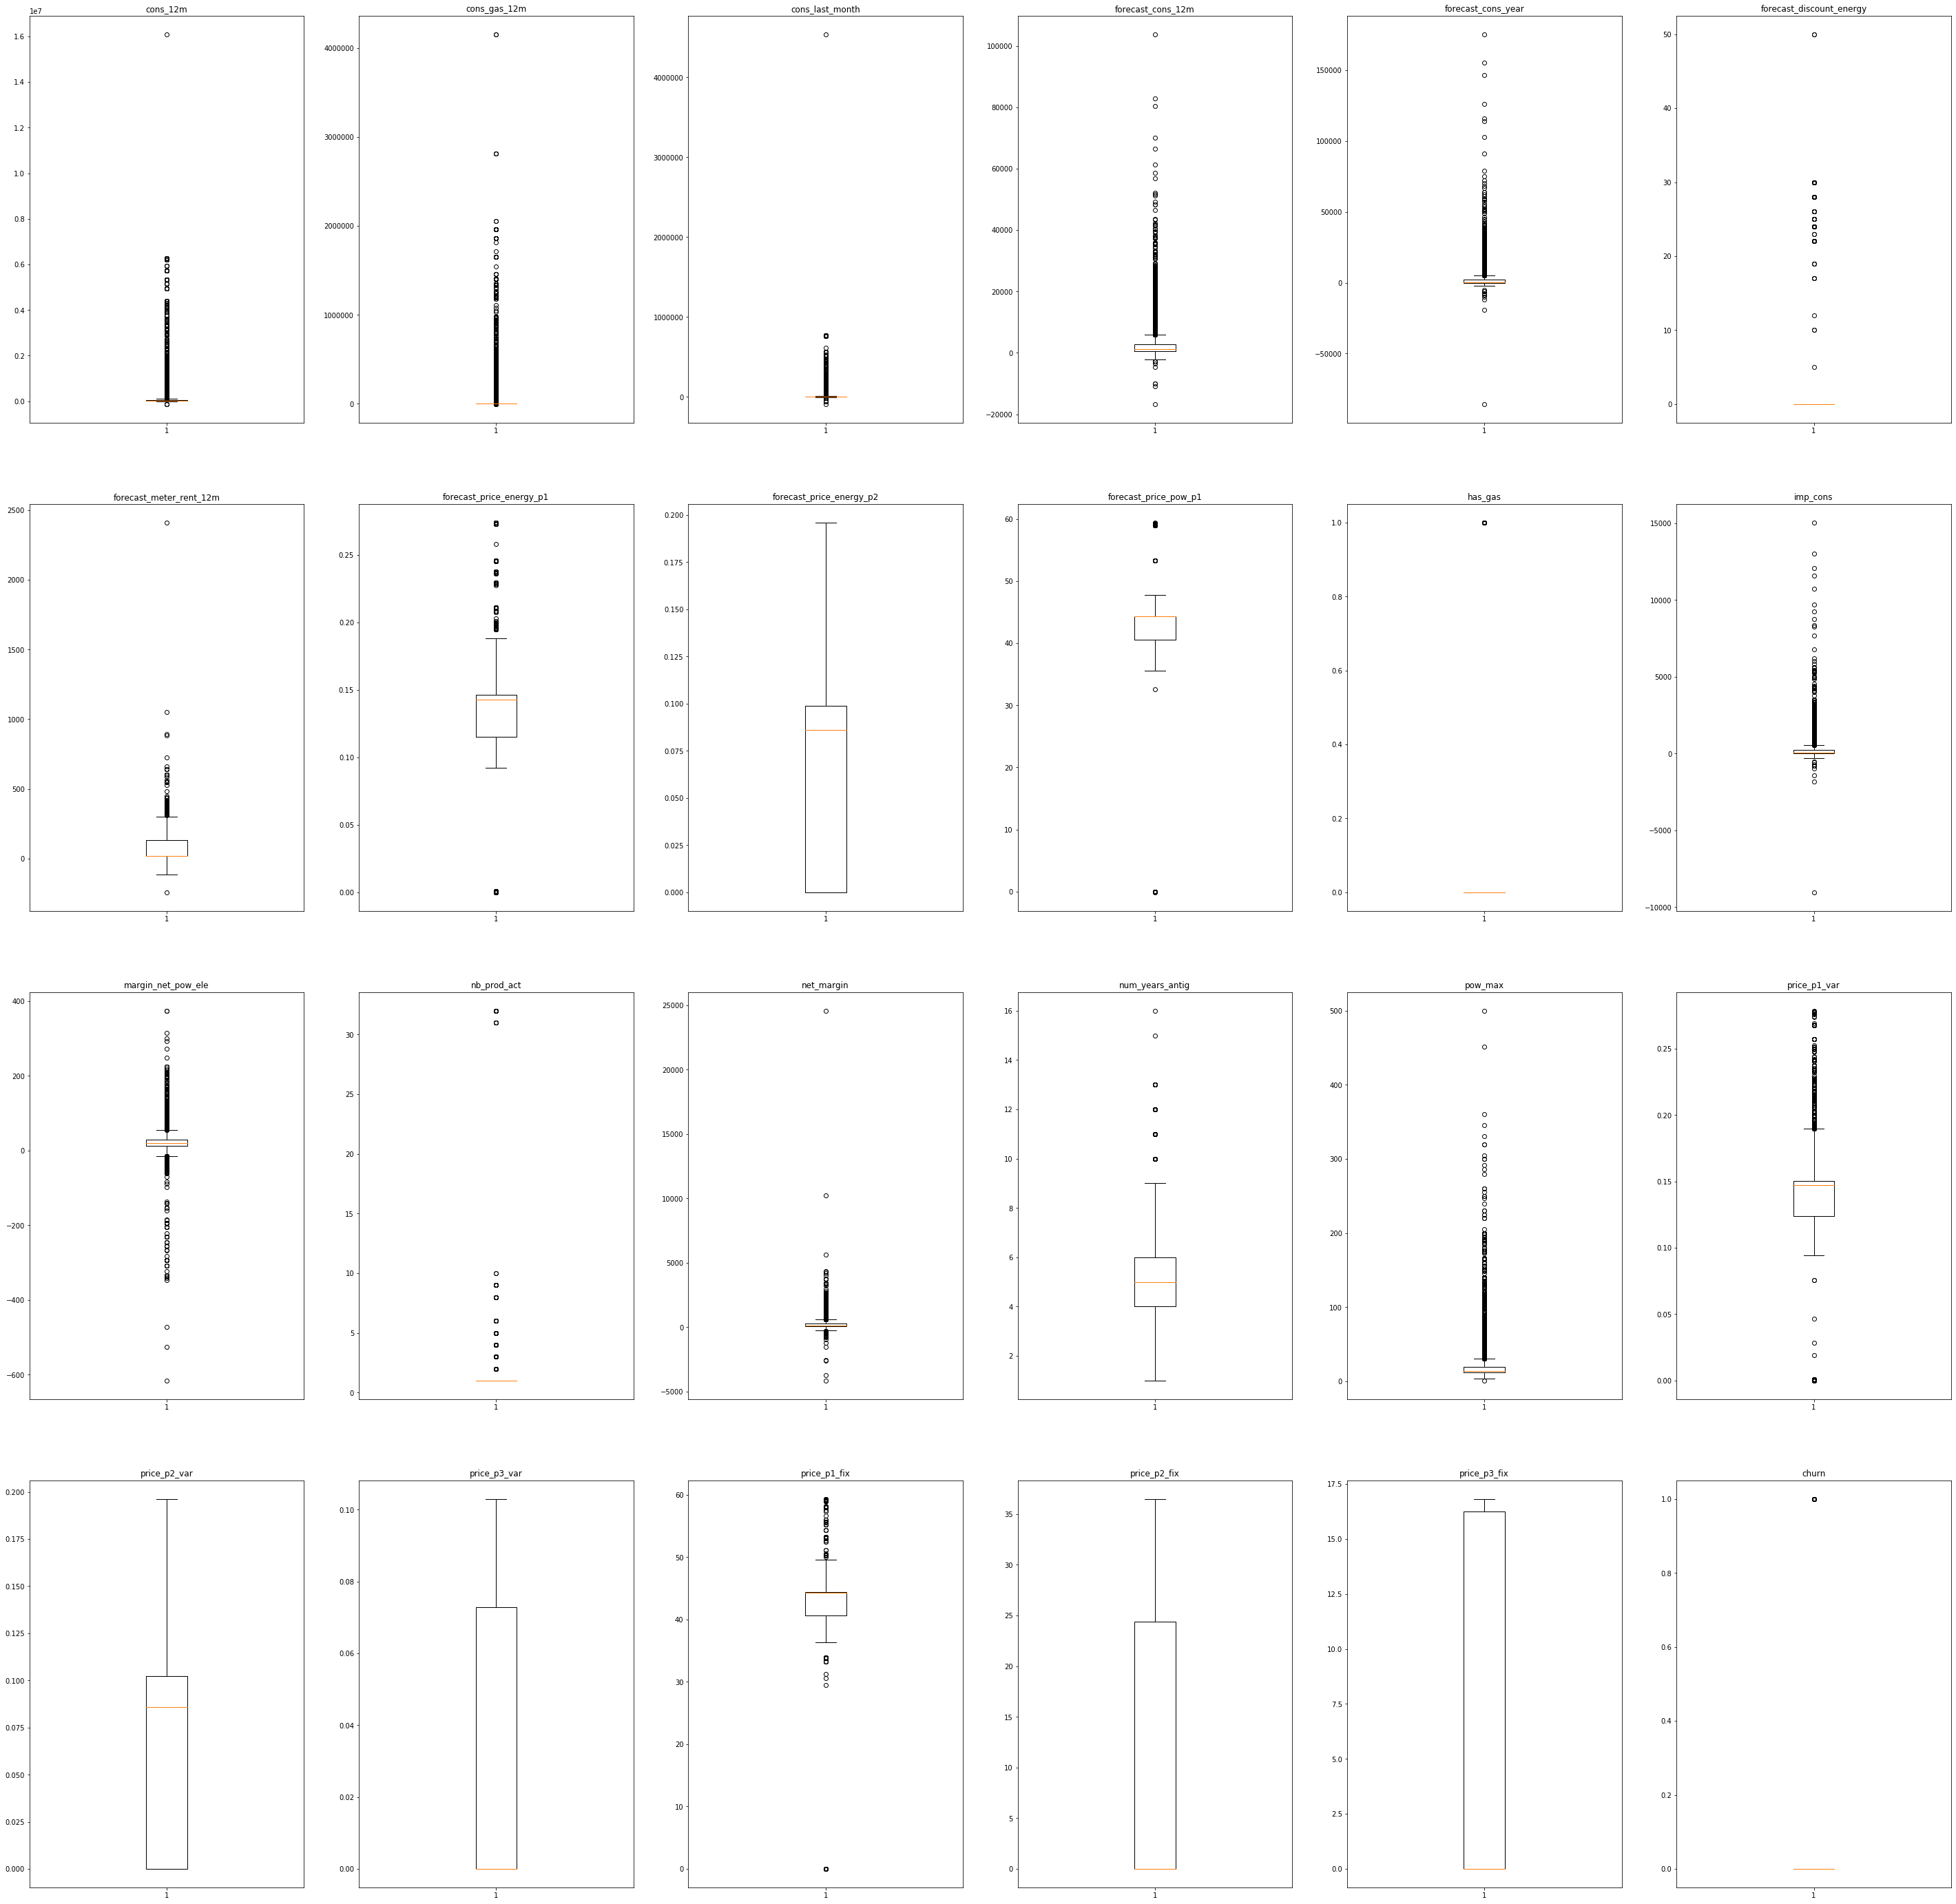

In [81]:
fig, axes = plt.subplots(4, 6, figsize = (50, 50))
for ax, col in zip(axes.ravel(), col_num.columns):
    ax.boxplot(col_num[col])
    ax.set(title = col)
fig.savefig(r'.\images\boxblot.png')

In [20]:
q1 = clean_data['margin_net_pow_ele'].quantile(0.25)
q3 = clean_data['margin_net_pow_ele'].quantile(0.95)
ior = q3 - q1
print(q1, q3, ior)
lower =  q1 - 1.5*ior
upper = q3 + 1.5*ior
outlier_removal = clean_data[clean_data['margin_net_pow_ele'].between(lower, upper)]
outlier_removal['churn'].value_counts()

11.95 49.92 37.97


0    14182
1    1505 
Name: churn, dtype: int64

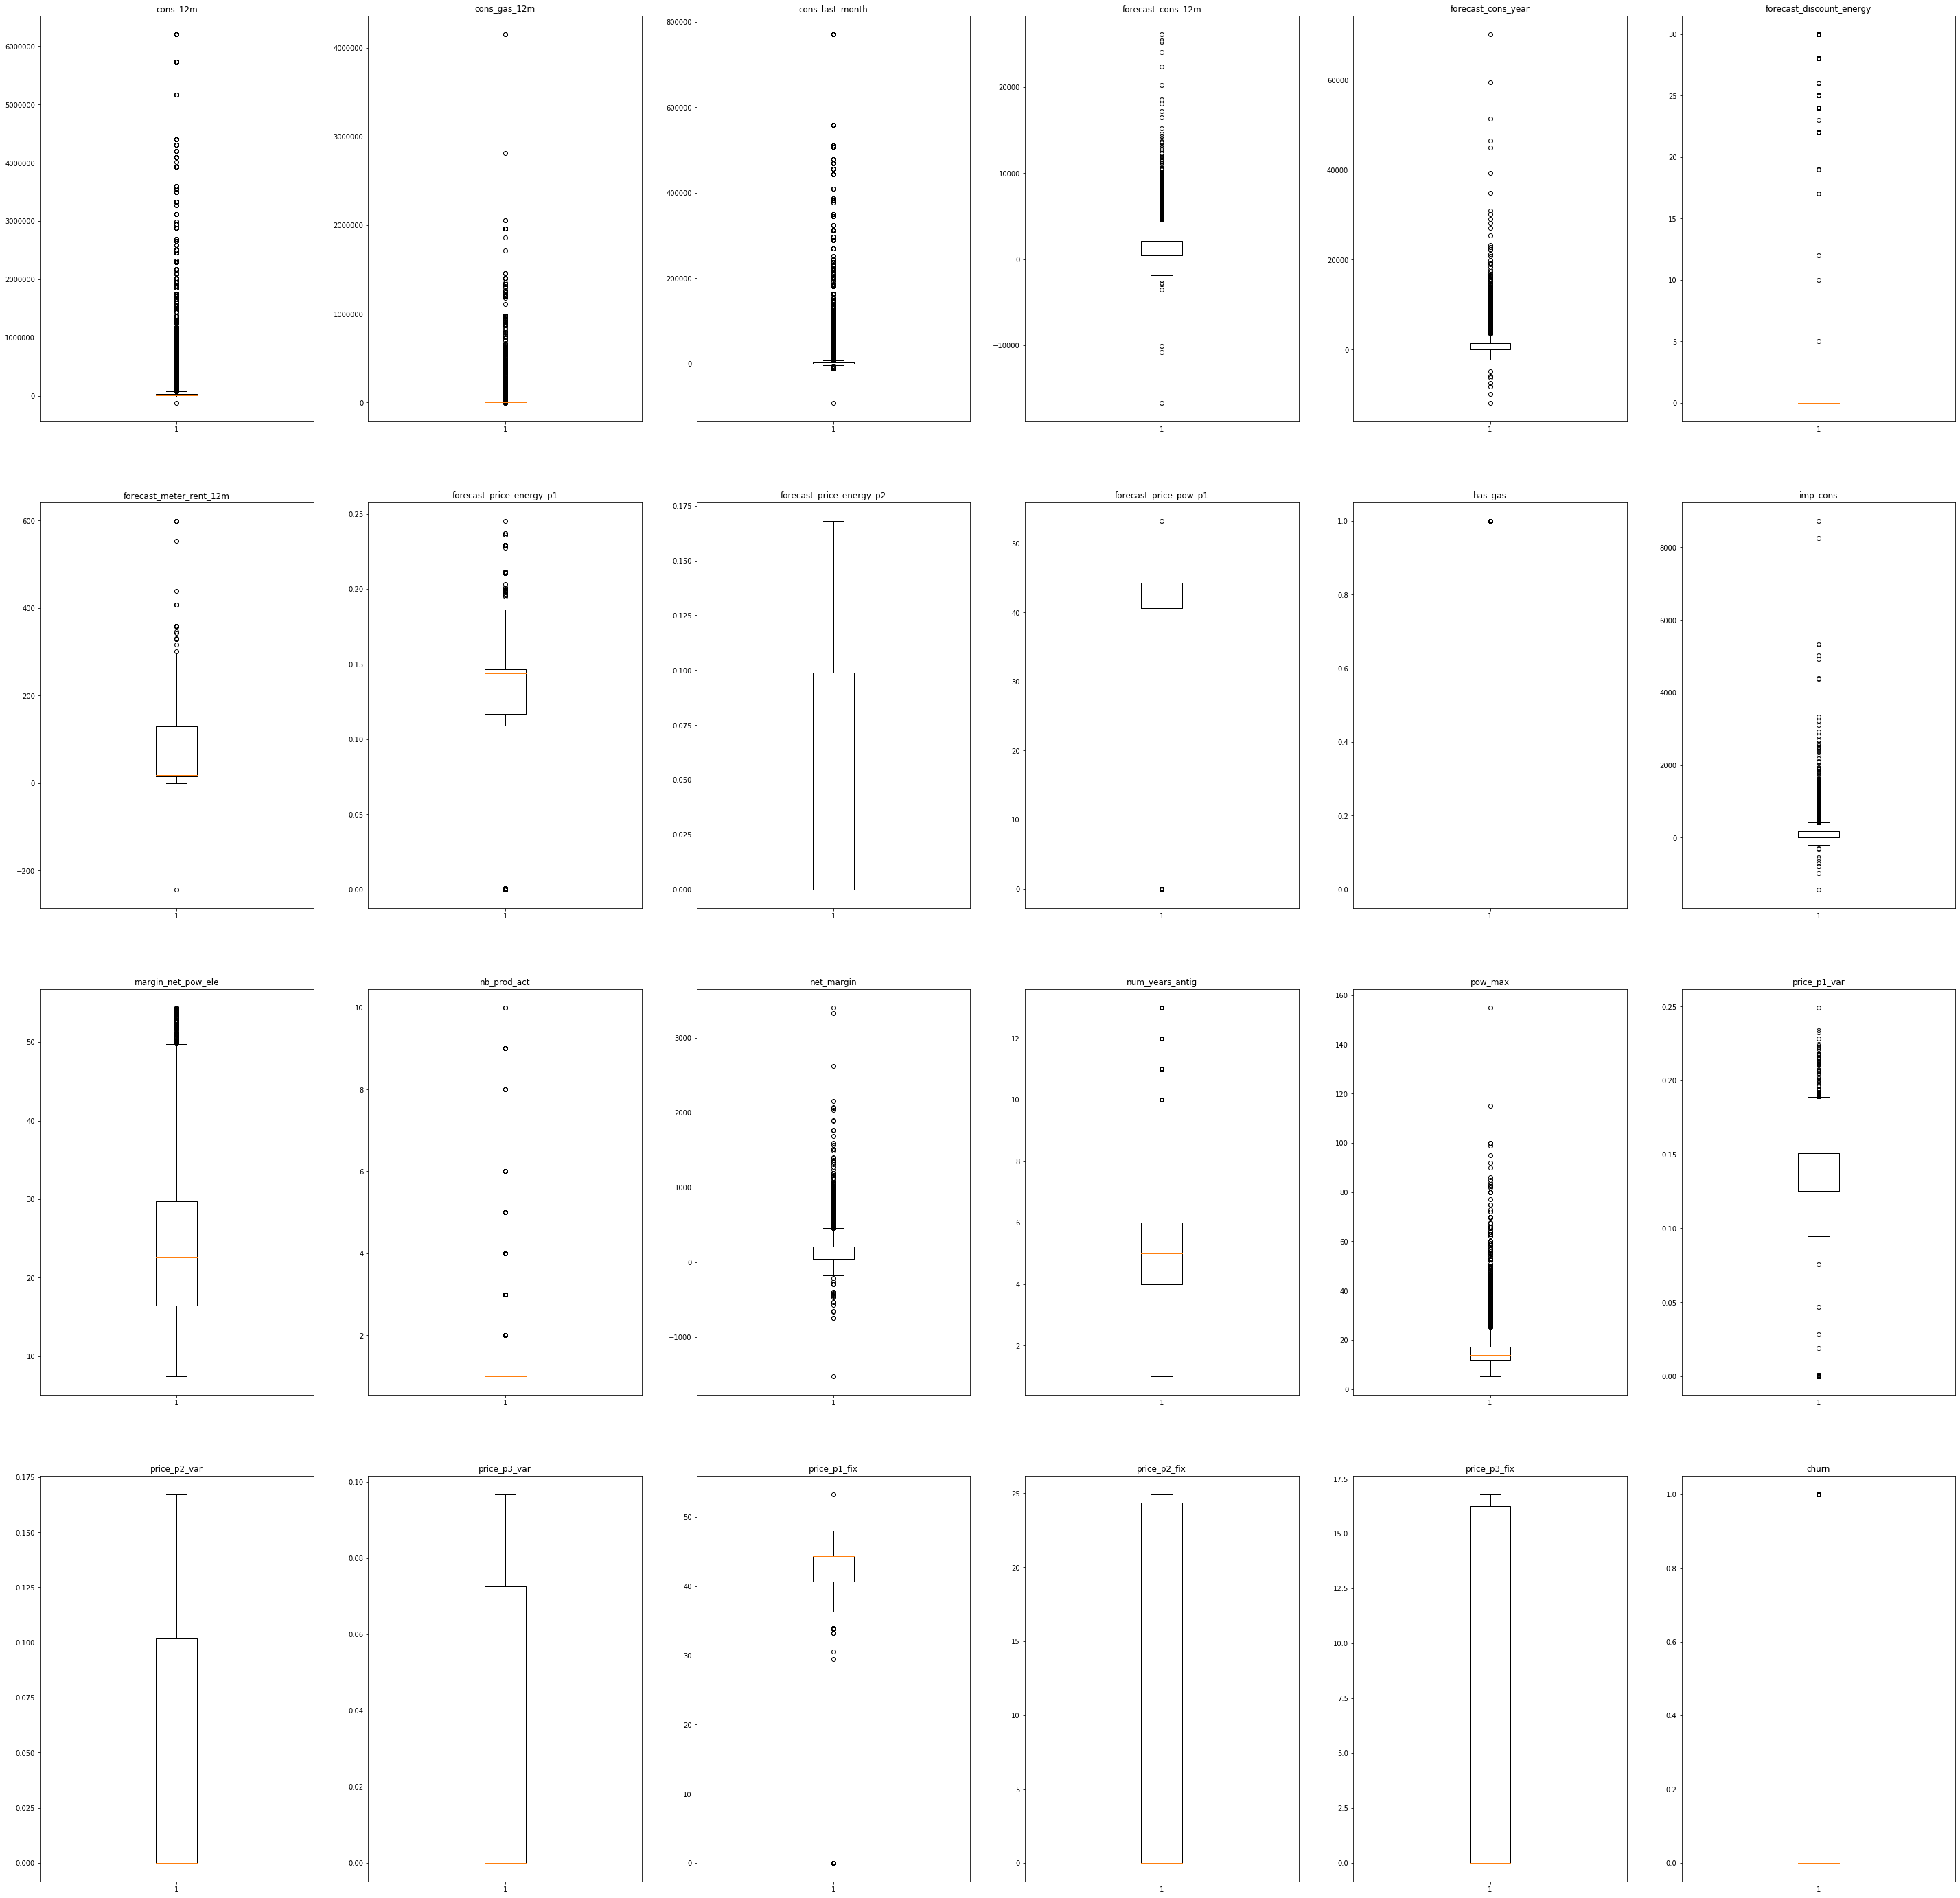

In [16]:
fig, axes = plt.subplots(4, 6, figsize = (50, 50))
for ax, col in zip(axes.ravel(), col_num.columns):
    ax.boxplot(outlier_removal[col])
    ax.set(title = col)
#fig.savefig(r'.\images\boxblot.png')

In [9]:
print(clean_data.columns)
print(len(clean_data.columns))

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_p1', 'forecast_price_energy_p2',
       'forecast_price_pow_p1', 'has_gas', 'imp_cons', 'margin_net_pow_ele',
       'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max',
       'price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix',
       'price_p2_fix', 'price_p3_fix', 'churn'],
      dtype='object')
27


In [6]:
n = clean_data[['cons_gas_12m', 'num_years_antig']].rolling(500, on = 'num_years_antig').mean()
n.set_index('num_years_antig', inplace = True)
n.head()

,cons_gas_12m
num_years_antig,
3,NaN
3,NaN
6,NaN
6,NaN
6,NaN


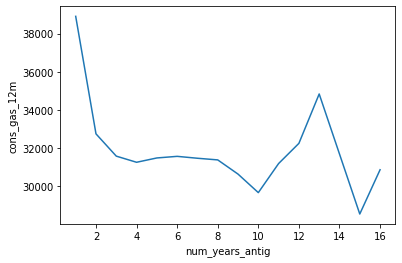

In [7]:
sns.lineplot(x = n.index, y= 'cons_gas_12m', data = n, ci = None);
#sns.scatterplot(x = 'date_renewal', y= 'cons_gas_12m', data = n);

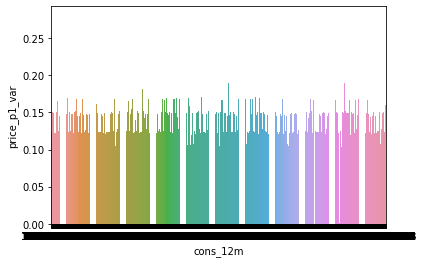

In [5]:
x = clean_data[['price_p1_var', 'cons_12m']].rolling(500, on = 'price_p1_var').mean()
#x.set_index('num_years_antig', inplace = True)
sns.barplot(y = 'price_p1_var', x = 'cons_12m', ci = None, data = x);
#clean_data.plot(y = 'price_p1_var', x ='cons_12m', kind = 'bar')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001E8F2F6E708> (for post_execute):


KeyboardInterrupt: 

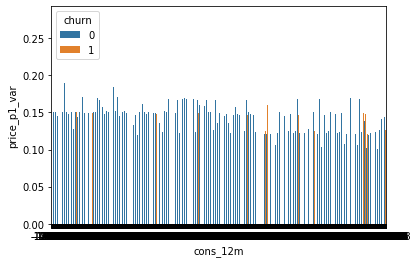

In [17]:
sns.barplot(y = 'price_p1_var', x = 'cons_12m', hue = 'churn', ci = None, data = clean_data);

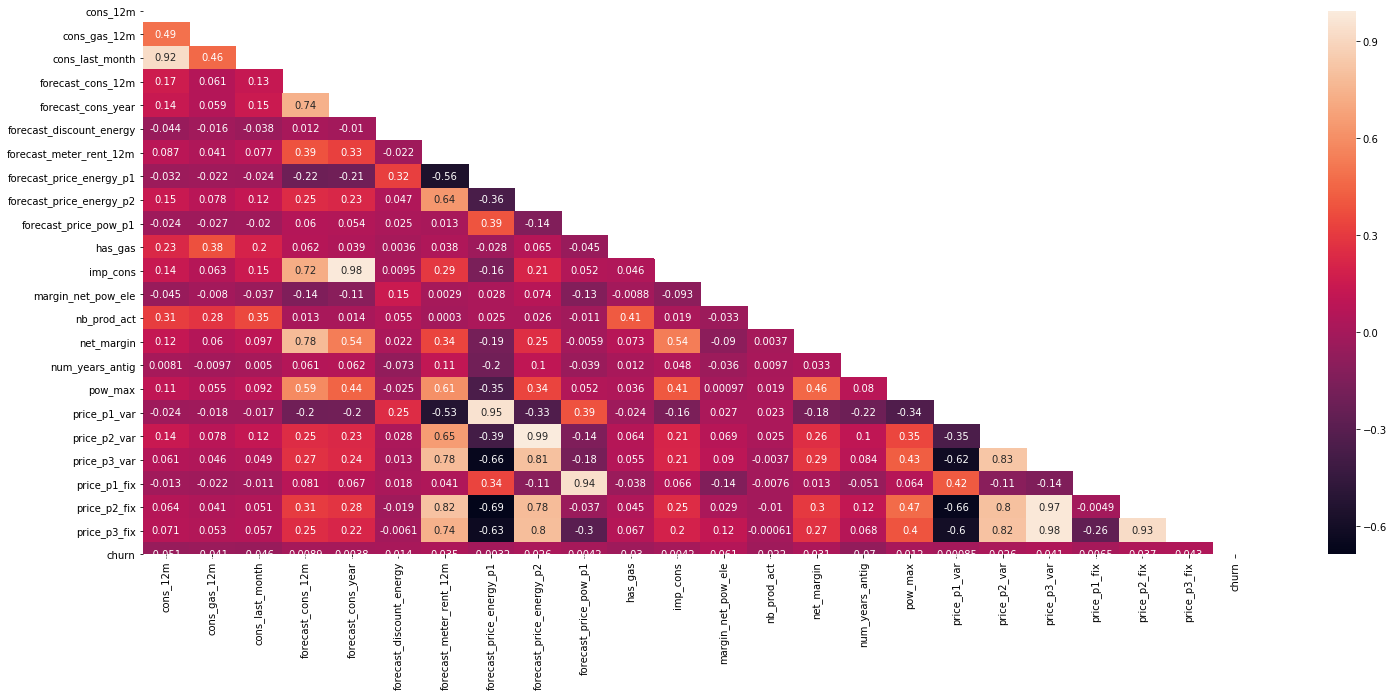

In [88]:
corr = clean_data.corr()
mask = np.tril(np.ones_like(corr, dtype=np.bool), k=-1)
new_data = corr.where(mask)
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.heatmap(new_data, annot=True)
fig.savefig(r'.\images\heatmap_of_the_corr.png')